In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
X_train.shape

(60000, 28, 28)

In [46]:
X_test.shape

(10000, 28, 28)

In [47]:
single_image= X_train[0]

In [48]:
single_image.shape

(28, 28)

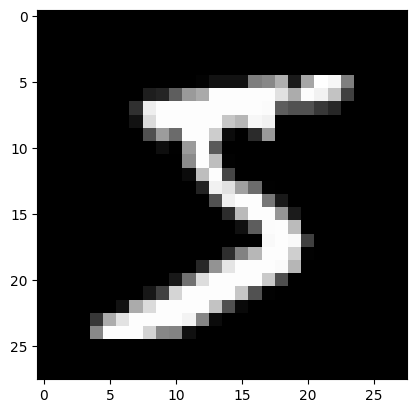

In [49]:
plt.imshow(single_image,cmap='gray')

In [50]:
y_train.shape

(60000,)

In [51]:
X_train.min()

0

In [52]:
X_train.max()

255

In [53]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [54]:
X_train_scaled.min()

0.0

In [55]:
X_train_scaled.max()

1.0

In [56]:
y_train[0]

5

In [57]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [58]:
type(y_train_onehot)

numpy.ndarray

In [59]:
y_train_onehot.shape

(60000, 10)

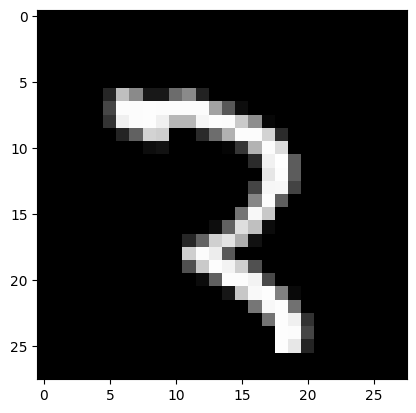

In [60]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [61]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [62]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [63]:
model = keras.Sequential()
input = keras.Input(shape=(28,28,1))
model.add(input)

model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [65]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [66]:
model.fit (X_train_scaled,
           y_train_onehot, 
           epochs=5,
           batch_size=64, 
           validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 82s 86ms/step - loss: 0.5965 - accuracy: 0.8025 - val_loss: 0.1307 - val_accuracy: 0.9638
Epoch 2/5
938/938 [==============================] - 78s 83ms/step - loss: 0.1168 - accuracy: 0.9689 - val_loss: 0.0799 - val_accuracy: 0.9783
Epoch 3/5
938/938 [==============================] - 76s 81ms/step - loss: 0.0757 - accuracy: 0.9794 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 4/5
938/938 [==============================] - 77s 82ms/step - loss: 0.0571 - accuracy: 0.9848 - val_loss: 0.0728 - val_accuracy: 0.9793
Epoch 5/5
938/938 [==============================] - 76s 81ms/step - loss: 0.0444 - accuracy: 0.9879 - val_loss: 0.0552 - val_accuracy: 0.9851


In [67]:
metrics = pd.DataFrame(model.history.history)

In [68]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.596451,0.802517,0.130725,0.9638
1,0.116824,0.968867,0.079878,0.9783
2,0.075739,0.979400,0.072972,0.9800
3,0.057054,0.984833,0.072751,0.9793
4,0.044404,0.987917,0.055228,0.9851


<Axes: >

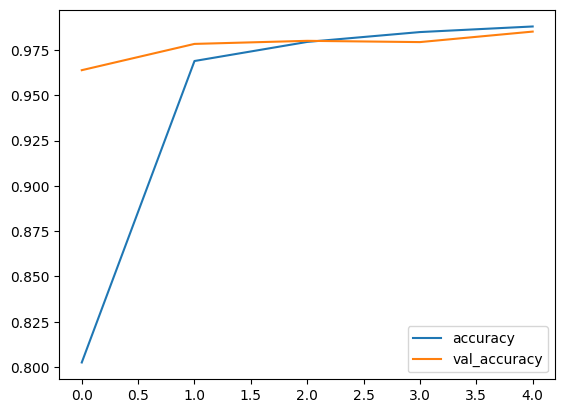

In [69]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

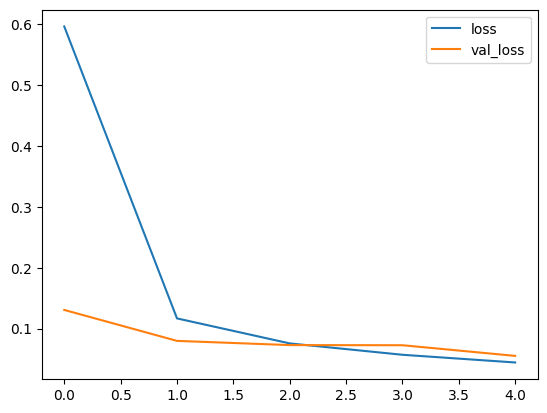

In [70]:
metrics[['loss','val_loss']].plot()

In [71]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 10ms/step


In [72]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    1    0    0    1    1    0    1    1]
 [   0 1124    0    1    2    1    1    4    2    0]
 [   4    0 1013    0    4    0    5    5    0    1]
 [   3    0    1 1000    0    3    0    0    1    2]
 [   0    2    2    0  974    0    0    0    0    4]
 [   1    0    0   15    0  874    1    0    0    1]
 [   5    2    9    1    1    3  933    2    2    0]
 [   0    1    1    0    0    2    1 1020    3    0]
 [   3    0    4    3    0    1    0    2  958    3]
 [   4    2    0   10    4    1    0    2    6  980]]


In [73]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [74]:
img = image.load_img('/content/drive/MyDrive/Clg/19AI413 Deep Learning/Datasets/imagefive.jpg')

In [75]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [76]:
img = image.load_img('/content/drive/MyDrive/Clg/19AI413 Deep Learning/Datasets/imagefive.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [77]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
    axis=1)

1/1 [==============================] - 0s 18ms/step


In [78]:
print(x_single_prediction)

[0]


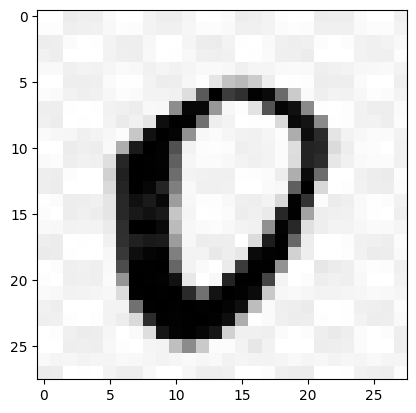

In [79]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [80]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [81]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
    axis=1)

1/1 [==============================] - 0s 23ms/step


In [82]:
print(x_single_prediction)

[0]
